In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [68]:
# 필요한 패키지 임포트
from sklearn.linear_model import LinearRegression
import pandas as pd

# 데이터 로드
egg = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이터분석_실전/달걀 지수.csv', encoding='cp949')  # 데이터 파일 경로에 맞게 수정해주세요
chicken = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이터분석_실전/닭고기 지수.csv', encoding='cp949')
fork = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이터분석_실전/돼지고기 지수.csv', encoding='cp949')
price = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이터분석_실전/품목별 가격 데이터 최종.csv', encoding='cp949')

# 종속 변수와 독립 변수 선택
X_egg = egg[['소비자물가지수(단일)', '신선식품 (신선식품지수)', '달걀 (품목별소비자물가)', 'Meat', '식품']]  # 독립 변수 선택 (인덱스 데이터 컬럼명에 맞게 수정해주세요)
X_chicken = chicken[['신선식품 (신선식품지수)', '닭고기 (수입물가지수)', '닭고기 (품목별소비자물가)', 'Meat', '식품']]
X_fork = fork[['소비자물가지수(단일)', '신선식품 (신선식품지수)', '돼지고기 (수입물가지수)', '돼지고기 (생산자물가지수)', 'Meat', '식품']]
X_egg

,소비자물가지수(단일),신선식품 (신선식품지수),달걀 (품목별소비자물가),Meat,식품
0,98.106,92.961,102.340,95.6,106.68
1,98.855,101.268,99.017,97.0,108.98
2,98.751,95.890,92.837,97.2,108.46
3,98.931,96.269,85.763,95.9,108.32
4,98.979,92.838,86.968,95.3,108.18
5,98.779,87.690,82.984,95.1,107.01
6,98.590,86.915,83.431,94.6,107.48
7,99.462,102.745,90.301,95.8,110.85
8,100.221,112.322,97.414,94.1,113.08
9,100.041,103.100,96.413,92.3,110.70


In [ ]:
X_fork

,소비자물가지수(단일),신선식품 (신선식품지수),돼지고기 (수입물가지수),돼지고기 (생산자물가지수),Meat,식품
0,98.106,92.961,116.31,82.61,95.6,106.68
1,98.855,101.268,118.08,84.52,97.0,108.98
2,98.751,95.890,116.90,84.31,97.2,108.46
3,98.931,96.269,116.59,91.87,95.9,108.32
4,98.979,92.838,117.31,98.57,95.3,108.18
5,98.779,87.690,117.17,109.42,95.1,107.01
6,98.590,86.915,113.56,110.55,94.6,107.48
7,99.462,102.745,112.96,105.55,95.8,110.85
8,100.221,112.322,116.91,111.08,94.1,113.08
9,100.041,103.100,118.15,85.93,92.3,110.70


In [ ]:
import numpy as np

price_transposed = price.transpose() # 종속 변수 선택 (가격 데이터 컬럼명에 맞게 수정해주세요)
price_transposed
# y_chicken = price['가격']
# y_fork = price['가격']
# y_egg

,0,1,2,3,4,5,6,7,8,9,10,11,12
Unnamed: 0,상추,호박,닭고기,돼지고기,애호박,양파,배,달걀,무,오징어,고등어,사과,오이
2018-01,1336.262626,2068.648649,5942.083333,12790.315789,2222.377049,3562.474747,2899.89,4252.005102,1716.2,3998.865979,3842.258065,1813.23,991.63
2018-02,1141.217822,2024.594595,6079.690722,13177.525773,2044.193548,3462.0,3321.143564,4214.560606,2454.808081,3808.091837,3696.774194,1968.178218,824.09
2018-03,1006.111111,2036.95122,6135.204082,13084.43299,2033.333333,3232.161616,3256.914573,3745.994949,2498.865979,3803.552083,3969.326087,1802.787879,724.383838
2018-04,942.686869,1393.170732,6072.572917,13087.368421,1386.525424,3182.787879,3309.874372,3708.994898,2653.084211,3934.795918,3379.795455,1825.581633,588.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08,2012.232955,1947.871287,7715.393393,3255.239186,1974.75,3951.591512,4496.964942,6237.728055,2502.560224,4032.461756,4275.943953,2372.021108,1264.813889
2022-09,1846.237875,2142.605932,7614.114286,3233.356557,2105.980392,4081.203463,4543.223373,6309.159544,2799.515625,4512.820046,4376.766509,2394.036957,1219.305677
2022-10,1335.667526,1691.711712,7503.103858,3337.428212,1612.628571,4113.407895,4232.479042,6300.455185,2846.245902,4926.037901,4343.302053,2201.940722,1034.388601
2022-11,1197.565789,1439.616438,7633.168142,3127.061381,1430.436047,4144.168,3519.706199,6443.92922,2418.190476,4654.052632,4505.866667,2221.931034,865.91623


In [ ]:
price_without_first_column = price_transposed.drop('Unnamed: 0'	, axis=0)
price_without_first_column

In [ ]:
y_egg = price_without_first_column.iloc[:, 7]  # 종속 변수 선택 (가격 데이터 컬럼명에 맞게 수정해주세요)
y_chicken = price_without_first_column.iloc[:, 2]
y_fork = price_without_first_column.iloc[:, 3]

달걀 지수에 대해서 모델 학습(model1)

In [ ]:
y_egg = price_without_first_column.iloc[:, 7]
y_egg

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

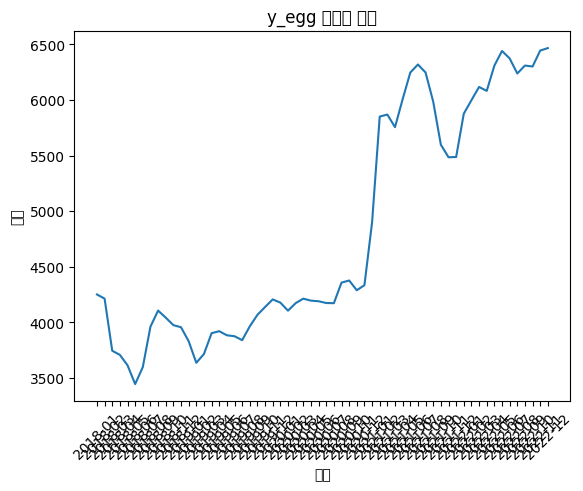

In [67]:
import matplotlib.pyplot as plt

plt.plot(y_egg.index, y_egg.values)
plt.xlabel('날짜')
plt.ylabel('가격')
plt.title('y_egg 데이터 추이')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# # 독립 변수 선택
# X_egg = price_without_first_column[['인덱스_데이터_1', '인덱스_데이터_2', '인덱스_데이터_3']]  # 인덱스 데이터 컬럼명에 맞게 수정해주세요

# # 종속 변수 선택
# y_egg = price_without_first_column['달걀_가격']  # 가격 데이터 컬럼명에 맞게 수정해주세요
# y_chicken = price_without_first_column['닭_가격']  # 가격 데이터 컬럼명에 맞게 수정해주세요
# y_fork = price_without_first_column['포크_가격']  # 가격 데이터 컬럼명에 맞게 수정해주세요

# # 선형 회귀 모델 훈련
# model1 = LinearRegression()
# model1.fit(X_egg, y_egg)

# # 예측
# index_data_2023_egg = [106.53116691913496, 112.1003654970228, 164.82694580823832, 117.69646242337993, 122.85438393793895]
# predicted_price_2023 = model1.predict([index_data_2023_egg])
# print("2023년 예측 가격:", predicted_price_2023)


In [ ]:
from sklearn.model_selection import train_test_split

# X_egg와 y_egg를 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X_egg, y_egg, test_size=0.2, random_state=42)

# 나누어진 데이터 세트 확인
print("훈련 세트 X:", X_train.shape)
print("훈련 세트 y:", y_train.shape)
print("테스트 세트 X:", X_test.shape)
print("테스트 세트 y:", y_test.shape)

훈련 세트 X: (48, 5)
훈련 세트 y: (48,)
테스트 세트 X: (12, 5)
테스트 세트 y: (12,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 선형 회귀 모델 생성
model1 = LinearRegression()

# 훈련 세트를 사용하여 모델 훈련
model1.fit(X_train, y_train)

# 테스트 세트에 대한 예측 수행
y_pred = model1.predict(X_test)

# 모델 정확도 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 21161.248510402158
R-squared (R^2): 0.9801220652414091


chat gpt 대답: MSE(Mean Squared Error)는 예측된 값과 실제 값 간의 차이의 제곱을 평균한 값입니다. MSE가 21161.2485로 나타났다는 것은 예측된 값과 실제 값 사이의 평균적인 오차가 약 21161.2485이라는 의미입니다. MSE는 오차의 제곱을 평균한 값이므로, 오차의 절댓값보다 큰 값을 갖게 됩니다. 따라서 MSE 값이 작을수록 모델의 예측이 더 정확하다고 판단할 수 있습니다.

R-squared (R^2)는 회귀 모델의 설명력을 나타내는 지표입니다. R-squared 값이 0.9801로 나타났다는 것은 모델이 종속 변수의 변동성을 약 98.01% 정도 설명할 수 있다는 의미입니다. R-squared 값은 0부터 1까지의 범위를 가지며, 1에 가까울수록 모델이 종속 변수를 잘 설명한다는 것을 의미합니다. 따라서 R-squared 값이 0.9801로 높게 나타났으므로, 모델이 종속 변수에 대해 매우 높은 설명력을 가지고 있다고 판단할 수 있습니다.

요약하면, MSE가 작고 R-squared 값이 높게 나타났으므로 해당 모델은 예측 성능이 좋고 종속 변수를 잘 설명하는 경향이 있습니다. 그러므로 이 모델은 주어진 데이터에 대해 높은 정확도를 가진 가격 예측을 수행할 수 있다고 해석할 수 있습니다.

MSE는 오차 제곱의 평균값 --> 2만이 나왔다는 건 오차의 평균은 140원이라는 의미 --> 140원 차이 정도면 낫뱃?

In [ ]:
# 선형 회귀 모델 훈련
model1 = LinearRegression()
model1.fit(X_egg, y_egg)

# 예측
index_data_2023_egg = [106.53116691913496, 112.1003654970228, 164.82694580823832, 117.69646242337993, 122.85438393793895] 
predicted_price_2023 = model1.predict([index_data_2023_egg])
print("2023년 예측 가격:", predicted_price_2023)

2023년 예측 가격: [6976.2124753]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


닭고기 지수에 대해서 모델 학습(model2)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

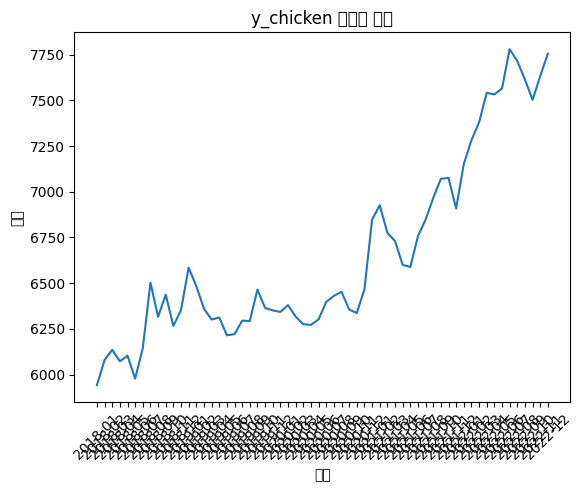

In [65]:
import matplotlib.pyplot as plt

plt.plot(y_chicken.index, y_chicken.values)
plt.xlabel('날짜')
plt.ylabel('가격')
plt.title('y_chicken 데이터 추이')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# X_egg와 y_egg를 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X_chicken, y_chicken, test_size=0.2, random_state=42)

# 나누어진 데이터 세트 확인
print("훈련 세트 X:", X_train.shape)
print("훈련 세트 y:", y_train.shape)
print("테스트 세트 X:", X_test.shape)
print("테스트 세트 y:", y_test.shape)

훈련 세트 X: (48, 5)
훈련 세트 y: (48,)
테스트 세트 X: (12, 5)
테스트 세트 y: (12,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 선형 회귀 모델 생성
model2 = LinearRegression()

# 훈련 세트를 사용하여 모델 훈련
model2.fit(X_train, y_train)

# 테스트 세트에 대한 예측 수행
y_pred = model2.predict(X_test)

# 모델 정확도 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 14948.70468942978
R-squared (R^2): 0.9527928678051742


In [ ]:
# 선형 회귀 모델 훈련
model2 = LinearRegression()
model2.fit(X_egg, y_egg)

# 예측
index_data_2023_chicken = [112.1003654970228, 40.56031586566651, 130.79240742621027, 117.69646242337993, 122.85438393793895]
predicted_price_2023 = model2.predict([index_data_2023_chicken])
print("2023년 예측 가격:", predicted_price_2023)

2023년 예측 가격: [6279.93558451]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


돼지고기 지수에 대해서 모델 학습(model3)

In [ ]:
from sklearn.model_selection import train_test_split

# X_egg와 y_egg를 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X_fork, y_fork, test_size=0.2, random_state=42)

# 나누어진 데이터 세트 확인
print("훈련 세트 X:", X_train.shape)
print("훈련 세트 y:", y_train.shape)
print("테스트 세트 X:", X_test.shape)
print("테스트 세트 y:", y_test.shape)

훈련 세트 X: (48, 6)
훈련 세트 y: (48,)
테스트 세트 X: (12, 6)
테스트 세트 y: (12,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 선형 회귀 모델 생성
model3 = LinearRegression()

# 훈련 세트를 사용하여 모델 훈련
model3.fit(X_train, y_train)

# 테스트 세트에 대한 예측 수행
y_pred = model3.predict(X_test)

# 모델 정확도 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 5500492.663579661
R-squared (R^2): 0.7975866611205288


In [ ]:
# 선형 회귀 모델 훈련
model3 = LinearRegression()
model3.fit(X_fork, y_fork)

# 예측
index_data_2023_fork = [106.53116691913496, 112.1003654970228, 156.54425699245726, 143.2545007794364, 117.69646242337993, 122.85438393793895]
predicted_price_2023 = model3.predict([index_data_2023_fork])
print("2023년 예측 가격:", predicted_price_2023)

2023년 예측 가격: [12518.29789813]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


왜 돼지고기 지수는 MSE도 크고 R-squared도 떨어질까?

In [ ]:
y_fork

2018-01    12790.315789
2018-02    13177.525773
2018-03     13084.43299
2018-04    13087.368421
2018-05    13626.104167
2018-06     14135.06383
2018-07    14957.543478
2018-08    14859.782609
2018-09    14370.978261
2018-10    13724.893617
2018-11       12529.375
2018-12       13371.875
2019-01         13030.0
2019-02    12797.263158
2019-03    12531.041667
2019-04    13175.090265
2019-05    13353.109462
2019-06    13278.640275
2019-07    13166.475483
2019-08    13035.023192
2019-09    13796.867816
2019-10    13466.053165
2019-11    12663.823454
2019-12    13013.253807
2020-01    12735.434501
2020-02    12440.725275
2020-03    13333.676839
2020-04    13424.348281
2020-05    14734.199301
2020-06     15644.89301
2020-07    15178.641371
2020-08    15523.882619
2020-09    13088.791878
2020-10    12518.551461
2020-11    11985.148064
2020-12    12077.611486
2021-01    11689.899497
2021-02    11640.642487
2021-03    11540.504975
2021-04    12140.528455
2021-05    12711.171355
2021-06    13200

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

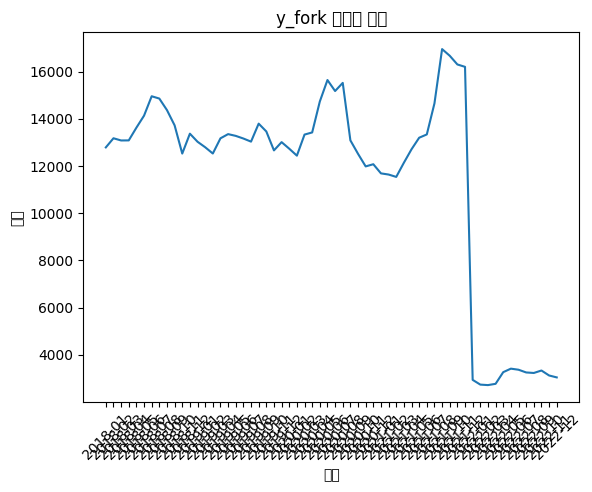

In [ ]:
import matplotlib.pyplot as plt

plt.plot(y_fork.index, y_fork.values)
plt.xlabel('날짜')
plt.ylabel('가격')
plt.title('y_fork 데이터 추이')
plt.xticks(rotation=45)
plt.show()

보면 2022년에 갑자기 돼지고기 가격이 팍 떨어지죠? 
이거 때문에 아마 다른 것보다 예측 정확도가 떨어진 듯 합니다. 찾아보니까 아프리카돼지열병이 원인으로 보임.
그렇다면 2022년도 자료를 빼고 하면 어떻게 될까?
22년도 12개 자료를 뺀 모델 (model4)

---



In [ ]:
X_fork_12 = X_fork.iloc[:-12]
y_fork_12 = y_fork.iloc[:-12]
y_fork_12

2018-01    12790.315789
2018-02    13177.525773
2018-03     13084.43299
2018-04    13087.368421
2018-05    13626.104167
2018-06     14135.06383
2018-07    14957.543478
2018-08    14859.782609
2018-09    14370.978261
2018-10    13724.893617
2018-11       12529.375
2018-12       13371.875
2019-01         13030.0
2019-02    12797.263158
2019-03    12531.041667
2019-04    13175.090265
2019-05    13353.109462
2019-06    13278.640275
2019-07    13166.475483
2019-08    13035.023192
2019-09    13796.867816
2019-10    13466.053165
2019-11    12663.823454
2019-12    13013.253807
2020-01    12735.434501
2020-02    12440.725275
2020-03    13333.676839
2020-04    13424.348281
2020-05    14734.199301
2020-06     15644.89301
2020-07    15178.641371
2020-08    15523.882619
2020-09    13088.791878
2020-10    12518.551461
2020-11    11985.148064
2020-12    12077.611486
2021-01    11689.899497
2021-02    11640.642487
2021-03    11540.504975
2021-04    12140.528455
2021-05    12711.171355
2021-06    13200

In [ ]:
from sklearn.model_selection import train_test_split

# X_egg와 y_egg를 훈련 세트와 테스트 세트로 나눔
X_train_12, X_test_12, y_train_12, y_test_12 = train_test_split(X_fork_12, y_fork_12, test_size=0.2, random_state=42)

# 나누어진 데이터 세트 확인
print("훈련 세트 X:", X_train_12.shape)
print("훈련 세트 y:", y_train_12.shape)
print("테스트 세트 X:", X_test_12.shape)
print("테스트 세트 y:", y_test_12.shape)

훈련 세트 X: (38, 6)
훈련 세트 y: (38,)
테스트 세트 X: (10, 6)
테스트 세트 y: (10,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 선형 회귀 모델 생성
model4 = LinearRegression()

# 훈련 세트를 사용하여 모델 훈련
model4.fit(X_train_12, y_train_12)

# 테스트 세트에 대한 예측 수행
y_pred_12 = model3.predict(X_test_12)

# 모델 정확도 평가
mse = mean_squared_error(y_test_12, y_pred_12)
r2 = r2_score(y_test_12, y_pred_12)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 299433.75150156306
R-squared (R^2): 0.4746548694521934


MSE는 현저하게 떨어졌지만 R^2는 왜 떨어졌을까? (이것이 유일한 의문점)

In [ ]:
# 선형 회귀 모델 훈련
model4 = LinearRegression()
model4.fit(X_fork_12, y_fork_12)

# 예측
index_data_2023_fork = [106.53116691913496, 112.1003654970228, 156.54425699245726, 143.2545007794364, 117.69646242337993, 122.85438393793895]
predicted_price_2023_12 = model4.predict([index_data_2023_fork])
print("2023년 예측 가격_12:", predicted_price_2023_12)

2023년 예측 가격_12: [17919.69973517]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


이전 예측값인 12518.29789813과 비교해 17919.69973517으로 많이 달라진 것을 볼 수 있다.

In [ ]:
# from sklearn.metrics import accuracy_score

# # 훈련 세트에 대한 예측 수행
# y_train_pred = model3.predict(X_train)

# # 테스트 세트에 대한 예측 수행
# y_test_pred = model3.predict(X_test)

# # 훈련 세트 정확도 계산
# train_accuracy = accuracy_score(y_train, y_train_pred)

# # 테스트 세트 정확도 계산
# test_accuracy = accuracy_score(y_test, y_test_pred)

# print("훈련 세트 정확도:", train_accuracy)
# print("테스트 세트 정확도:", test_accuracy)

ValueError: ignored

chat gpt: 회귀 작업에서는 accuracy_score 함수를 사용하여 정확도를 계산할 수 없습니다. 대신 회귀 작업에서는 다른 지표들을 사용하여 모델의 성능을 평가해야 합니다. 예를 들어, 평균 제곱 오차(Mean Squared Error, MSE)나 결정 계수(R-squared) 등의 지표를 활용하여 모델의 예측 성능을 측정할 수 있습니다.

분류 작업이 아닌 회귀 작업에서는 accuracy_score 대신 다른 적절한 평가 지표를 사용하여 모델의 성능을 확인해 보시기 바랍니다.